**Table of contents**<a id='toc0_'></a>    
- [World Happiness Report](#toc1_)    
  - [Context](#toc1_1_)    
  - [Content](#toc1_2_)    
  - [Data Cleaning](#toc1_3_)    
      - [Charge data files](#toc1_3_1_1_)    
      - [Explore data files](#toc1_3_1_2_)    
      - [Data cleaning](#toc1_3_1_3_)    
  - [Data Visualization](#toc1_4_)    
      - [Indicators correlation](#toc1_4_1_1_)    
      - [Least and most happier countries for year](#toc1_4_1_2_)    
      - [Happiness score evolution of a single country (Mexico)](#toc1_4_1_3_)    
      - [Indicators variation over the years for a single country (Mexico)](#toc1_4_1_4_)    
      - [Happiness Score behaviour per Region](#toc1_4_1_5_)    
      - [Happiness Score evolution per Region](#toc1_4_1_6_)    
      - [Happiest vs least happy country comparison](#toc1_4_1_7_)    
  - [Map visualization](#toc1_5_)    
      - [Import countries position data](#toc1_5_1_1_)    
      - [Explore countries position data using a map](#toc1_5_1_2_)    
      - [Prepare our data with the new position values](#toc1_5_1_3_)    
      - [Plot our data in a map](#toc1_5_1_4_)    
    - [Choropleth map of Happiness score](#toc1_5_2_)    
  - [Data exploitation](#toc1_6_)    
    - [Exploratory Data Analysis (EDA)](#toc1_6_1_)    
      - [Correlations](#toc1_6_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[World Happiness Report](#toc0_)

## <a id='toc1_1_'></a>[Context](#toc0_)
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## <a id='toc1_2_'></a>[Content](#toc0_)
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## <a id='toc1_3_'></a>[Data Cleaning](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Charge data files](#toc0_)

In [205]:
import pandas as pd
import numpy as np

In [206]:
# Charge data files into different DataFrames

df_2015 = pd.read_csv("world_happinness_report/2015.csv")
df_2016 = pd.read_csv("world_happinness_report/2016.csv")
df_2017 = pd.read_csv("world_happinness_report/2017.csv")
df_2018 = pd.read_csv("world_happinness_report/2018.csv")
df_2019 = pd.read_csv("world_happinness_report/2019.csv")

#### <a id='toc1_3_1_2_'></a>[Explore data files](#toc0_)

In [207]:
# Print the shape of each DataFrame to know the number of files and columns for each one

print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


We can see that our DataFrames have different number of columns. Also, as each row in the datasets reprensents a Country, we can see that spmme countries have been not added in the lasts DataFrames. This means we cannot merge them yet. 
We'll now analyse the columns differences

In [208]:
# Print columns names for each DataFrame

print("2015 Dataframe columns : ")
print(df_2015.columns)
print("2016 Dataframe columns : ")
print(df_2016.columns)
print("2017 Dataframe columns : ")
print(df_2017.columns)
print("2018 Dataframe columns : ")
print(df_2018.columns)
print("2019 Dataframe columns : ")
print(df_2019.columns)

2015 Dataframe columns : 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataframe columns : 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Dataframe columns : 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Dataframe columns : 
Index(['Overall rank', 'Countr

From the columns names we can see that the not shared columns between DataFrames are :

- 2015 DataFrame : Standard Error, Dystopia Residual
- 2016 DataFrame : Lower Confidence Interval, Upper Confidence Interval, Dystopia Residual
- 2017 DataFrame : Whisker.high, Whisker.low

Also, the "Region" column is not longer available in the 2017-2019 datasets. As this column may be interesting to analyse, we will add it to the DataFrames

And for the rest of columns, we'll need to rename in order to have the same names in all the DataFrames

#### <a id='toc1_3_1_3_'></a>[Data preparation](#toc0_)

In [209]:
# Drop extra columns
df_2015.drop(["Standard Error", "Dystopia Residual"], axis = 1, inplace= True)
df_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis = 1, inplace= True)
df_2017.drop(["Whisker.high", "Whisker.low","Dystopia.Residual"], axis = 1, inplace= True)

In order to prepare our data to be merged, we'll change the column's names for each Dataframe so that all the columns are name the same.

In [210]:
# Rename columns in DataFrames

df_2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Corruption_perception', 'Generosity']

df_2016.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Corruption_perception', 'Generosity']

df_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']

df_2018.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']

df_2019.columns = ['Happiness_Rank', 'Country', 'Happiness_Score',
       'GDP_per_capita', 'Family', 'Health',
       'Freedom', 'Generosity','Corruption_perception']


In [211]:
# Set the Country column as the index column for all DataFrames
df_2015 = df_2015.set_index("Country")
df_2016 = df_2016.set_index("Country")
df_2017 = df_2017.set_index("Country")
df_2018 = df_2018.set_index("Country")
df_2019 = df_2019.set_index("Country")

Now, to merge all datasets we need to add the "Region" column to those dataframes without it. To do so we'll look for the value corresponding to each country in 2015 and 2016 datasets. As a first step we'll merge the 2015 and 2016 datasets

In [212]:
# Add a Year column to all DataFrames
df_2015["Year"] = "2015"
df_2016["Year"] = "2016"
df_2017["Year"] = "2017"
df_2018["Year"] = "2018"
df_2019["Year"] = "2019"

In [213]:
# Concatenate our DataFrames to cover all Country-Region pairs

df = pd.concat([df_2015,df_2016])
print(df.shape)
df.head()

(315, 10)


,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [214]:
# Create a dictionnary with the values 'Country' as key and 'Region' as value

country_region = pd.DataFrame(df['Region'])
country_region.reset_index().drop_duplicates(subset='Country', inplace= True)
country_region = pd.Series(country_region.Region, index= country_region.index).to_dict()


Now we'll add a new column 'Region' to our 2017-2019 Datasets. And we'll insert the Region value based in the dictionary we have just created

In [215]:
# Map the country value with our dictionary to get the region value
df_2017["Region"] = df_2017.index.map(country_region)
df_2018["Region"] = df_2018.index.map(country_region)
df_2019["Region"] = df_2019.index.map(country_region)

Now we concatenate all our datasets

In [216]:
df = pd.concat([df, df_2017, df_2018, df_2019])
df.shape

(782, 10)

If we explore our "Region" column, we'll see that some countries have a NaN value.
This may be because the country was not in our dictionary or because the name was not the same in our different dataframes.

In [217]:
# Show the Countries with NaN value in the 'Region' column
df[df["Region"].isna()]

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
Trinidad & Tobago,NaN,38,6.192,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,2018
Northern Cyprus,NaN,58,5.835,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,2018
Trinidad & Tobago,NaN,39,6.192,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,2019
Northern Cyprus,NaN,64,5.718,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,2019
North Macedonia,NaN,84,5.274,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,2019
Gambia,NaN,120,4.516,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,2019


We can see that for some countries as Taiwan and Hong Kong, the sufix may have caused an error while addind the "Region" column. Lets change the names and correct the 'Region' value.

In [218]:
# Rename index

df.rename(index={'Taiwan Province of China':'Taiwan'},inplace=True)
df.rename(index={'Hong Kong S.A.R., China':'Hong Kong'},inplace=True)
df.rename(index={'Trinidad & Tobago':'Trinidad and Tobago'},inplace=True)
df.rename(index={'Northern Cyprus':'North Cyprus'},inplace=True)
df.rename(index={'North Macedonia':'Macedonia'},inplace=True)

# Add the correct Region value to changed index
df.loc["Taiwan","Region"] = country_region.get("Taiwan")
df.loc["Hong Kong","Region"] = country_region.get("Hong Kong")
df.loc["Trinidad and Tobago","Region"] = country_region.get("Trinidad and Tobago")
df.loc["North Cyprus","Region"] = country_region.get("North Cyprus")
df.loc["Macedonia","Region"] = country_region.get("Macedonia")

In [219]:
# Show the Countries with NaN value in the 'Region' column
df[df["Region"].isna()]

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Gambia,NaN,120,4.516,0.308,0.939,0.428,0.382,0.167,0.269,2019


We still have isues for Gambia. As for Gambia we only have date from 2019, the easiest solution in this case is to erease this value as it has no high impact in our data.

In [220]:
df.drop(["Gambia"], axis = 0, inplace= True)

Now we have our Dataset almost ready to be threated. We'll start doing some visualizations to get a better idea of what our data is telling us.

## <a id='toc1_4_'></a>[Data Visualization](#toc0_)

To do our data visualization we'll import some helpful libraries

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### <a id='toc1_4_1_1_'></a>[Indicators correlation](#toc0_)

Let's start by looking at our indicators correlation.

C:\Users\osval\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



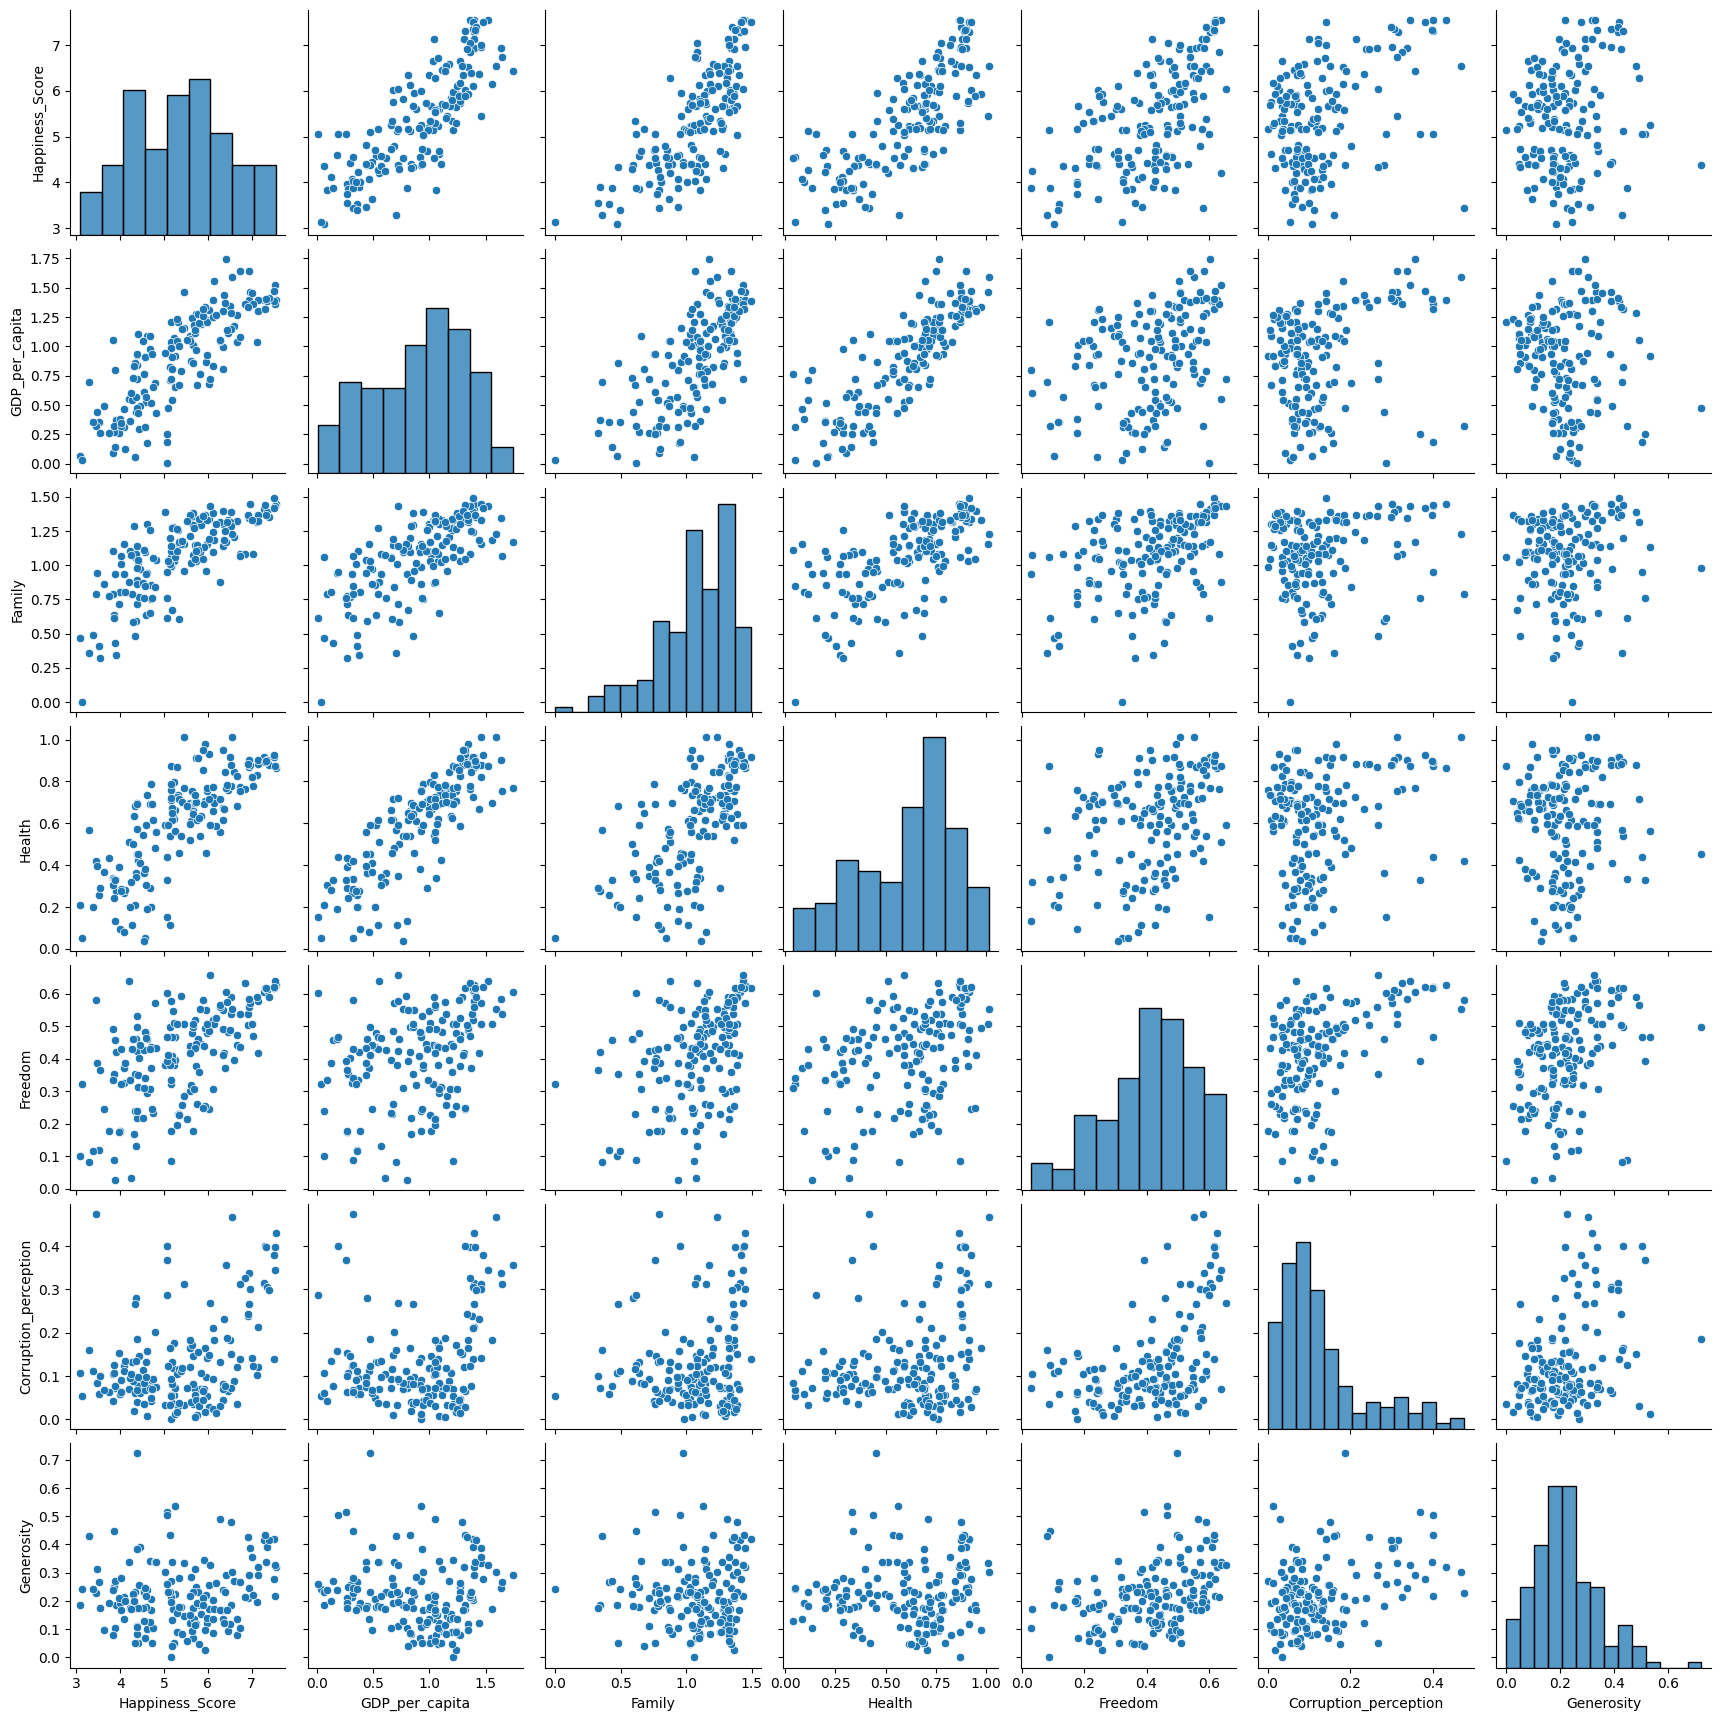

In [222]:
# Plot scatter matrix
df.loc[:,~df.columns.isin(["Region","Happiness_Rank","Year"])].groupby('Country').mean()
sns.pairplot(df.loc[:,~df.columns.isin(["Region","Happiness_Rank","Year"])].groupby('Country').mean())

Here what is important to us is mostly the relationship between our dependent variable (Happiness Score) and our predictors.

By looking at the first row of our plot, we can see that most of our predictors have a linear positive relation with the Happiness Score.

For our "Corruption perception" variable maybe an exponential function could describe the relationship with our objective variable and for the "Generosity" variable is not really clear that a relationship exists.

#### <a id='toc1_4_1_2_'></a>[Least and most happier countries for year](#toc0_)

Let's see the most and the least happier countries for year

In [223]:
# Agregate our columns by year and get the min and the max values for Happiness Score
df_min_max = df.groupby(['Year'])["Happiness_Score"].agg(["idxmax","idxmin"])
df_min_max.rename(columns={"idxmin":"Least happier Country", "idxmax":"Most happier Country"}, inplace=True)

# Get Happiness_Score value for the least and the most happier countries  per year
df_min_max_scores = df.groupby(['Year'])["Happiness_Score"].agg(["max","min"])
df_min_max_scores.rename(columns={"max":"Top Happiness Score", "min":"Min Happiness Score"}, inplace=True)

# Merge data into a same dataframe and display
min_max_scores = pd.concat([df_min_max,df_min_max_scores], axis=1)
columns = ["Most happier Country","Top Happiness Score","Least happier Country","Min Happiness Score"]
min_max_scores = min_max_scores[columns]
min_max_scores

,Most happier Country,Top Happiness Score,Least happier Country,Min Happiness Score
Year,,,,
2015,Switzerland,7.587,Togo,2.839
2016,Denmark,7.526,Burundi,2.905
2017,Norway,7.537,Central African Republic,2.693
2018,Finland,7.632,Burundi,2.905
2019,Finland,7.769,South Sudan,2.853


#### <a id='toc1_4_1_3_'></a>[Happiness score evolution of a single country (Mexico)](#toc0_)

Let's see the Hapinness score over the years for Mexico

In [224]:
# Define our Mexico's DataFrame
mexico = df.loc["Mexico"]
mexico

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Mexico,Latin America and Caribbean,14,7.187,1.020540,0.914510,0.814440,0.48181,0.213120,0.14074,2015
Mexico,Latin America and Caribbean,21,6.778,1.115080,0.714600,0.711430,0.37709,0.183550,0.11735,2016
Mexico,Latin America and Caribbean,25,6.578,1.153184,1.210862,0.709979,0.41273,0.132774,0.12099,2017
Mexico,Latin America and Caribbean,24,6.488,1.038000,1.252000,0.761000,0.47900,0.095000,0.06900,2018
Mexico,Latin America and Caribbean,23,6.595,1.070000,1.323000,0.861000,0.43300,0.073000,0.07400,2019


In [225]:
# Get Happiness score from Mexico's DataFrame
mexico_hs= mexico[["Year","Happiness_Score"]]
mexico_hs.set_index("Year", inplace=True)
mexico_hs

,Happiness_Score
Year,
2015,7.187
2016,6.778
2017,6.578
2018,6.488
2019,6.595


We plot our data to see the evolution over time

In [226]:
# Plotly plot version

fig = px.line(mexico_hs.reset_index(), x="Year", y="Happiness_Score", 
                text = "Happiness_Score",
                title = "Mexico's happiness score from 2015-2019",
                markers= True)

# Set values over the bars
fig.update_traces(textposition="top right")

fig.show()

In [227]:
# Matplot plot version
"""
mexico_hs.plot()

plt.title("Mexico's happiness score from 2015-2019")
plt.ylabel("Hapinness Score")
plt.xlabel("Year")

plt.show()
"""

'\nmexico_hs.plot()\n\nplt.title("Mexico\'s happiness score from 2015-2019")\nplt.ylabel("Hapinness Score")\nplt.xlabel("Year")\n\nplt.show()\n'

#### <a id='toc1_4_1_4_'></a>[Indicators variation over the years for a single country (Mexico)](#toc0_)

Lets see how the indicators vary for Mexico over the years 

In [228]:
mexico

,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Year
Country,,,,,,,,,,
Mexico,Latin America and Caribbean,14,7.187,1.020540,0.914510,0.814440,0.48181,0.213120,0.14074,2015
Mexico,Latin America and Caribbean,21,6.778,1.115080,0.714600,0.711430,0.37709,0.183550,0.11735,2016
Mexico,Latin America and Caribbean,25,6.578,1.153184,1.210862,0.709979,0.41273,0.132774,0.12099,2017
Mexico,Latin America and Caribbean,24,6.488,1.038000,1.252000,0.761000,0.47900,0.095000,0.06900,2018
Mexico,Latin America and Caribbean,23,6.595,1.070000,1.323000,0.861000,0.43300,0.073000,0.07400,2019


In [229]:
indicators = ["GDP_per_capita","Family","Health","Freedom","Corruption_perception","Generosity"]

In [230]:
# Matplot plot version 
"""
plt.figure(figsize=(10,6))
plt.plot(mexico["Year"], mexico[indicators])
plt.legend(indicators,loc="upper left")
plt.title("Mexico's indicators from 2015-2019")
plt.ylabel("Indicators")
plt.xlabel("Year")
"""

'\nplt.figure(figsize=(10,6))\nplt.plot(mexico["Year"], mexico[indicators])\nplt.legend(indicators,loc="upper left")\nplt.title("Mexico\'s indicators from 2015-2019")\nplt.ylabel("Indicators")\nplt.xlabel("Year")\n'

In [231]:
# Plotly plot version
fig = px.line(pd.concat([mexico[indicators],mexico["Year"]], axis=1), x="Year", y=indicators,
                        title = "Mexico's indicators from 2015-2019", markers=True,
                        labels= {
                            "value" : "Indicator value"
                        })
fig.show()

#### <a id='toc1_4_1_5_'></a>[Happiness Score behaviour per Region](#toc0_)

Lets see what is the behavior for region

In [232]:
# Get some statistics for our grouped data over the years
df.groupby(["Year","Region"])["Happiness_Score"].agg(["max","min","mean","size"])

max    min      mean  size
Year Region                                                       
2015 Australia and New Zealand        7.286  7.284  7.285000     2
     Central and Eastern Europe       6.505  4.218  5.332931    29
     Eastern Asia                     6.298  4.874  5.626167     6
     Latin America and Caribbean      7.226  4.518  6.144682    22
     Middle East and Northern Africa  7.278  3.006  5.406900    20
     North America                    7.427  7.119  7.273000     2
     Southeastern Asia                6.798  3.819  5.317444     9
     Southern Asia                    5.253  3.575  4.580857     7
     Sub-Saharan Africa               5.477  2.839  4.202800    40
     Western Europe                   7.587  4.857  6.689619    21
2016 Australia and New Zealand        7.334  7.313  7.323500     2
     Central and Eastern Europe       6.596  4.217  5.370690    29
     Eastern Asia                     6.379  4.907  5.624167     6
     Latin America and Caribbean      7.087  4.028  6.101750    24
     Middle East and Northern Africa  7.267  3.069  5.386053    19
     North America                    7.404  7.104  7.254000     2
     Southeastern Asia                6.739  3.907  5.338889     9
     Southern Asia                    5.196  3.360  4.563286     7
     Sub-Saharan Africa               5.648  2.905  4.136421    38
     Western Europe                   7.526  5.033  6.685667    21
2017 Australia and New Zealand        7.314  7.284  7.299000     2
     Central and Eastern Europe       6.609  4.096  5.409931    29
     Eastern Asia                     6.422  4.955  5.646667     6
     Latin America and Caribbean      7.079  3.603  5.957818    22
     Middle East and Northern Africa  7.213  3.462  5.369684    19
     North America                    7.316  6.993  7.154500     2
     Southeastern Asia                6.572  4.168  5.444875     8
     Southern Asia                    5.269  3.794  4.628429     7
     Sub-Saharan Africa               5.629  2.693  4.111949    39
     Western Europe                   7.537  5.195  6.703714    21
2018 Australia and New Zealand        7.324  7.272  7.298000     2
     Central and Eastern Europe       6.711  4.103  5.463966    29
     Eastern Asia                     6.441  5.125  5.672000     6
     Latin America and Caribbean      7.072  3.582  5.950136    22
     Middle East and Northern Africa  6.814  3.355  5.282737    19
     North America                    7.328  6.886  7.107000     2
     Southeastern Asia                6.343  4.308  5.313444     9
     Southern Asia                    5.472  3.632  4.603857     7
     Sub-Saharan Africa               5.891  2.905  4.195026    39
     Western Europe                   7.632  5.358  6.781762    21
2019 Australia and New Zealand        7.307  7.228  7.267500     2
     Central and Eastern Europe       6.852  4.332  5.561517    29
     Eastern Asia                     6.446  5.191  5.688833     6
     Latin America and Caribbean      7.167  3.597  5.954429    21
     Middle East and Northern Africa  7.139  3.380  5.237000    19
     North America                    7.278  6.892  7.085000     2
     Southeastern Asia                6.262  4.360  5.273667     9
     Southern Asia                    5.653  3.203  4.526857     7
     Sub-Saharan Africa               5.888  2.853  4.294513    39
     Western Europe                   7.769  5.287  6.842190    21

In [233]:
# Getting only 2015 data
df[df['Year']=="2015"].groupby(["Region"])["Happiness_Score"].agg(["mean","size"])

,mean,size
Region,,
Australia and New Zealand,7.285000,2
Central and Eastern Europe,5.332931,29
Eastern Asia,5.626167,6
Latin America and Caribbean,6.144682,22
Middle East and Northern Africa,5.406900,20
North America,7.273000,2
Southeastern Asia,5.317444,9
Southern Asia,4.580857,7
Sub-Saharan Africa,4.202800,40


In [234]:
# Definition of out Happiness per region DataFrame
# We take the mean value for our indicators over the years so we only group by Region

happiness_per_region = pd.DataFrame(df.groupby(["Region"])["Happiness_Score"].mean()).sort_values(by=["Happiness_Score"], ascending=False)
happiness_per_region

,Happiness_Score
Region,
Australia and New Zealand,7.294600
North America,7.174700
Western Europe,6.740590
Latin America and Caribbean,6.023811
Eastern Asia,5.651567
Central and Eastern Europe,5.427807
Middle East and Northern Africa,5.337208
Southeastern Asia,5.335227
Southern Asia,4.580657


Let's see this data in a more visual way. Lets plot the average Happiness Score value (from 2015 to 2019) for each region.

In [235]:
# Plotly plot version
fig = px.bar(happiness_per_region.reset_index(), x="Region", y="Happiness_Score",
                        title = "Mean Happiness Score for region between 2015-2019",
                        text_auto = ".2s",
                        color = "Region",
                        labels= {
                            "Happiness_Score" : "Happiness Score"
                        })

# Remove the x axis name
fig.update_layout(xaxis_title=None)

# Set values over the bars
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

In [236]:
#Matplot plot version

"""
# Set our barplot colors palette
sns.set_palette("Set1")

# Set our graph size
plt.figure(figsize=(10,6))

# Plot our data
ax = sns.barplot(data = happiness_per_region.reset_index(), x="Region", y="Happiness_Score")

# Add labels vertical inclination to improve improve legibility
plt.xticks(rotation=80)

plt.title("Mean Happiness Score for region between 2015-2019")
plt.ylabel("Happiness Score")

# Add column values
ax.set(xlabel=None)
for i in ax.containers:
    ax.bar_label(i,)
    
"""


'\n# Set our barplot colors palette\nsns.set_palette("Set1")\n\n# Set our graph size\nplt.figure(figsize=(10,6))\n\n# Plot our data\nax = sns.barplot(data = happiness_per_region.reset_index(), x="Region", y="Happiness_Score")\n\n# Add labels vertical inclination to improve improve legibility\nplt.xticks(rotation=80)\n\nplt.title("Mean Happiness Score for region between 2015-2019")\nplt.ylabel("Happiness Score")\n\n# Add column values\nax.set(xlabel=None)\nfor i in ax.containers:\n    ax.bar_label(i,)\n    \n'

Let's see our Happiness Score value in a boxplot.

In [237]:
# Dataframe grouped by country 
df_hs_region = pd.DataFrame(df.groupby(["Country"])["Happiness_Score"].mean())
df_hs_region["Region"] = df_hs_region.index.map(country_region)
df_hs_region.head()

,Happiness_Score,Region
Country,,
Afghanistan,3.51280,Southern Asia
Albania,4.71260,Central and Eastern Europe
Algeria,5.66760,Middle East and Northern Africa
Angola,3.87225,Sub-Saharan Africa
Argentina,6.45940,Latin America and Caribbean


In [238]:
# Plotly plot version
fig = px.box(df_hs_region, x="Region", y="Happiness_Score",
                        width=900, height=700, # Figure size
                        title = "Mean Happiness Score for region between 2015-2019",
                        color = "Region",
                        labels= {
                            "Happiness_Score" : "Happiness Score"
                        })

# Remove the x axis name
fig.update_layout(xaxis_title=None)

fig.show()

In [239]:
# Matplot plot version
"""
# Set our barplot colors palette
sns.set_palette("Set1")

# Set our graph size
plt.figure(figsize=(10,6))

# Plot our data
ax = sns.boxplot(data = df_hs_region, x="Region", y="Happiness_Score")
ax.set(xlabel=None)
# Add labels vertical inclination to improve improve legibility
plt.xticks(rotation=80)

plt.title("Happiness Score per region over the years 2015-2019")
plt.ylabel("Happiness Score")

"""

'\n# Set our barplot colors palette\nsns.set_palette("Set1")\n\n# Set our graph size\nplt.figure(figsize=(10,6))\n\n# Plot our data\nax = sns.boxplot(data = df_hs_region, x="Region", y="Happiness_Score")\nax.set(xlabel=None)\n# Add labels vertical inclination to improve improve legibility\nplt.xticks(rotation=80)\n\nplt.title("Happiness Score per region over the years 2015-2019")\nplt.ylabel("Happiness Score")\n\n'

Let's identify the outliers in our data

In [240]:
# For the latin america outliner we look for the min value in the DataFrame
hs_latin_america = df_hs_region[(df_hs_region["Region"]== "Latin America and Caribbean")]
hs_latin_america[hs_latin_america["Happiness_Score"] == hs_latin_america["Happiness_Score"].min()]

,Happiness_Score,Region
Country,,
Haiti,3.8656,Latin America and Caribbean


In [241]:
# Information about the values in the Latin America's DataFrame
hs_latin_america.describe()

,Happiness_Score
count,24.000000
mean,6.062650
std,0.689316
min,3.865600
25%,5.712950
50%,6.150900
75%,6.479050
max,7.126200


In [242]:
# Sub-Saharan Africa outliner
hs_sub_sarahan_africa = df_hs_region[(df_hs_region["Region"]== "Sub-Saharan Africa")]
hs_sub_sarahan_africa[hs_sub_sarahan_africa["Happiness_Score"] == hs_sub_sarahan_africa["Happiness_Score"].max()]

,Happiness_Score,Region
Country,,
Mauritius,5.7066,Sub-Saharan Africa


In [243]:
# General information about the values in the Sub-Saharan DataFrame
hs_sub_sarahan_africa.describe()

,Happiness_Score
count,44.000000
mean,4.223436
std,0.541118
min,3.079000
25%,3.880313
50%,4.257475
75%,4.543875
max,5.706600


#### <a id='toc1_4_1_6_'></a>[Happiness Score evolution per Region](#toc0_)

Let's see the evolution of the Happiness Score over the years for each region

In [244]:
# Data preparation to have the evolution of the Happiness Score over year per region
df_hs_region_years = pd.DataFrame(df.groupby(["Year","Region"])["Happiness_Score"].mean())
df_hs_region_years = df_hs_region_years.reset_index().pivot(index = "Region", columns="Year")

df_hs_region_years = pd.DataFrame(df_hs_region_years.droplevel(0, axis=1))
df_hs_region_years

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500
Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517
Eastern Asia,5.626167,5.624167,5.646667,5.672000,5.688833
Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.282737,5.237000
North America,7.273000,7.254000,7.154500,7.107000,7.085000
Southeastern Asia,5.317444,5.338889,5.444875,5.313444,5.273667
Southern Asia,4.580857,4.563286,4.628429,4.603857,4.526857
Sub-Saharan Africa,4.202800,4.136421,4.111949,4.195026,4.294513


In [245]:
years = ["2015","2016","2017","2018","2019"]
df_hs_region_years.transpose()

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,
2015,7.2850,5.332931,5.626167,6.144682,5.406900,7.2730,5.317444,4.580857,4.202800,6.689619
2016,7.3235,5.370690,5.624167,6.101750,5.386053,7.2540,5.338889,4.563286,4.136421,6.685667
2017,7.2990,5.409931,5.646667,5.957818,5.369684,7.1545,5.444875,4.628429,4.111949,6.703714
2018,7.2980,5.463966,5.672000,5.950136,5.282737,7.1070,5.313444,4.603857,4.195026,6.781762
2019,7.2675,5.561517,5.688833,5.954429,5.237000,7.0850,5.273667,4.526857,4.294513,6.842190


In [246]:
# Plotly plot version
fig = px.line(df_hs_region_years.transpose(),
                title = "Mean Happiness Score for region between 2015-2019",
                markers = True,
                labels ={
                    "value" : "Happiness Score"
                }  
)



fig.show()

In [247]:
# Matplot plot version
"""

# Set our graph size
plt.figure(figsize=(11,7))


for region in df_hs_region_years.index :
    df_hs_region_years.loc[region].plot()
    #ax = sns.lineplot(data = df_hs_region_years.loc[region])

plt.xlabel = None
# Add labels vertical inclination to improve improve legibility

plt.legend(df_hs_region_years.index,loc="upper left")

plt.title("Happiness Score per region from 2015-2019")
plt.ylabel("Happiness Score")

"""

'\n\n# Set our graph size\nplt.figure(figsize=(11,7))\n\n\nfor region in df_hs_region_years.index :\n    df_hs_region_years.loc[region].plot()\n    #ax = sns.lineplot(data = df_hs_region_years.loc[region])\n\nplt.xlabel = None\n# Add labels vertical inclination to improve improve legibility\n\nplt.legend(df_hs_region_years.index,loc="upper left")\n\nplt.title("Happiness Score per region from 2015-2019")\nplt.ylabel("Happiness Score")\n\n'

#### <a id='toc1_4_1_7_'></a>[Happiest vs least happy country comparison](#toc0_)

Finally lets compare the happiest country vs the least happy country over the years

In [248]:
indicators.append('Happiness_Score') # Append Happiness Score if not in indicators list
indicators

['GDP_per_capita',
 'Family',
 'Health',
 'Freedom',
 'Corruption_perception',
 'Generosity',
 'Happiness_Score']

In [249]:
df_indicators_over_years = pd.DataFrame(df.groupby(["Country"])[indicators].mean())
df_indicators_over_years

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score
Country,,,,,,,
Afghanistan,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,3.51280
Albania,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.71260
Algeria,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,5.66760
Angola,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,3.87225
Argentina,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.45940
...,...,...,...,...,...,...,...
Venezuela,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,5.53140
Vietnam,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,5.15460
Yemen,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,3.62580


In [250]:
max_happiness_score = df_indicators_over_years["Happiness_Score"].max()
most_happy_country = df_indicators_over_years[df_indicators_over_years["Happiness_Score"]== max_happiness_score].index.values[0]
print("The most happier country is ",most_happy_country, "with %.2f" %max_happiness_score, " happiness score value")

The most happier country is  Denmark with 7.55  happiness score value


In [251]:
min_happiness_score = df_indicators_over_years["Happiness_Score"].min()
less_happy_country = df_indicators_over_years[df_indicators_over_years["Happiness_Score"]== min_happiness_score].index.values[0]
print("The least happier country is ",less_happy_country, "with %.2f" %min_happiness_score, " happiness score value")

The least happier country is  Burundi with 3.08  happiness score value


In [252]:
indicators.remove('Happiness_Score')
indicators.append('Year')
indicators

['GDP_per_capita',
 'Family',
 'Health',
 'Freedom',
 'Corruption_perception',
 'Generosity',
 'Year']

In [253]:
least_happy_country = df.loc[[less_happy_country]].index[0]
most_happy_country = df.loc[[most_happy_country]].index[0]

df_less_happy = df.loc[[less_happy_country]][indicators].reset_index().drop("Country", axis=1).set_index('Year')
df_most_happy = df.loc[[most_happy_country]][indicators].reset_index().drop("Country", axis=1).set_index('Year')

# Add a sufix to columns to identify origin country for indicators
df_most_happy = df_most_happy.add_suffix("_"+most_happy_country)
df_less_happy = df_less_happy.add_suffix("_"+least_happy_country)

# Concatenate both countries values into a DataFrame
pd.concat([df_less_happy, df_most_happy], axis=1)

,GDP_per_capita_Burundi,Family_Burundi,Health_Burundi,Freedom_Burundi,Corruption_perception_Burundi,Generosity_Burundi,GDP_per_capita_Denmark,Family_Denmark,Health_Denmark,Freedom_Denmark,Corruption_perception_Denmark,Generosity_Denmark
Year,,,,,,,,,,,,
2015,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,1.325480,1.360580,0.874640,0.649380,0.48357,0.34139
2016,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900,1.441780,1.163740,0.795040,0.579410,0.44453,0.36171
2017,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.482383,1.551122,0.792566,0.626007,0.40077,0.35528
2018,0.091000,0.627000,0.145000,0.065000,0.076000,0.149000,1.351000,1.590000,0.868000,0.683000,0.40800,0.28400
2019,0.046000,0.447000,0.380000,0.220000,0.180000,0.176000,1.383000,1.573000,0.996000,0.592000,0.41000,0.25200


Finally lets see the indicators values over the years for this two countries

In [254]:
# Plotly plot version

fig = px.line(pd.concat([df_less_happy, df_most_happy], axis=1),
                title = "Indicators for the most and the least happy countries over the years",
                labels = {
                    "value" : "Indicator Value",
                    "variable" : "Indicator"
                }
            )
fig.show()

## <a id='toc1_5_'></a>[Maps visualization](#toc0_)

In this section we'll show our data using Map visuals. To do that, we'll use the mean Happiness Score for each country

### <a id='toc1_5_1_1_'></a>[Import countries position data](#toc0_)

Our first step is to import geographical data of each country. To to that, we'll import an Open Source csv file shared by Gavin in it's GitHub repo : https://github.com/gavinr/world-countries-centroids

In [255]:
# Get countries position data
countries_geo_data = pd.read_csv('https://cdn.jsdelivr.net/gh/gavinr/world-countries-centroids@v1.0.0/dist/countries.csv')
countries_geo_data.head()

,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO
0,-170.700732,-14.305712,American Samoa,AS,United States,US
1,166.638003,19.302046,United States Minor Outlying Islands,UM,United States,US
2,-159.787689,-21.222613,Cook Islands,CK,New Zealand,NZ
3,-149.400417,-17.674684,French Polynesia,PF,France,FR
4,-169.868781,-19.052309,Niue,NU,New Zealand,NZ


### <a id='toc1_5_1_2_'></a>[Explore countries position data using a map](#toc0_)

The values we are using for our plots are the "Latitude" and the "Longitude" of each country. Which are used as parameters in our plot function.

In [256]:
fig = px.scatter_mapbox(countries_geo_data, lat="latitude", lon="longitude", hover_name="COUNTRY", hover_data=["longitude", "latitude"],
                        color_discrete_sequence=["blue"], zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


#### <a id='toc1_5_1_3_'></a>[Prepare our data with the new position values](#toc0_)

What we'll do is to insert the "Latitude" and "Longitude" values for each country in our DataFrame.
As we do for the "Region" value, we are using a dictionary to inject this values as two new columns.

In [257]:
countries_data = df[["Happiness_Score"]]

countries_data["Latitude"] = np.nan
countries_data["Longitude"] = np.nan

# Create a dictionnary for latitude and longitud for each country in our dataset
latitudes = {}
longitudes = {}

for country in countries_data.index:
    if country in countries_geo_data["COUNTRY"].values:
        longitude = countries_geo_data[countries_geo_data["COUNTRY"]==country]["longitude"].iloc[0]
        latitude = countries_geo_data[countries_geo_data["COUNTRY"]==country]["latitude"].iloc[0]
        latitudes[country] = latitude
        longitudes[country] = longitude

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\1398409331.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\1398409331.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [258]:
# Fill the position columns in out DataFrame using our dictionaries

countries_data["Latitude"] = countries_data.index.map(latitudes)
countries_data["Longitude"] = countries_data.index.map(longitudes)
countries_data.head()


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\2355972562.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\2355972562.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Happiness_Score,Latitude,Longitude
Country,,,
Switzerland,7.587,46.736781,8.286929
Iceland,7.561,65.123609,-19.056830
Denmark,7.527,56.001188,9.378671
Norway,7.522,64.977759,16.670259
Canada,7.427,57.550480,-98.416805


#### <a id='toc1_5_1_4_'></a>[Plot our data in a map](#toc0_)

Now let's start visualizing our data.
For the first step we'll plot a map where each country will be shown with a bubble representing the Happiness Score with a color and size.
(Make sure to hover over the countries to see the information)

In [259]:
# Plot our map
fig = px.scatter_mapbox(countries_data.reset_index(), lat="Latitude", lon="Longitude", hover_name="Country", 
                        hover_data=["Longitude", "Latitude"],
                        size = "Happiness_Score",
                        color = "Happiness_Score",
                        color_continuous_scale=px.colors.diverging.RdYlGn, size_max=10,
                        zoom=1, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

As you can see, for each country we plot a bubble which size and colour are proportionals to the Happiness Score over the years for the country.

### <a id='toc1_5_2_'></a>[Choropleth map of Happiness score](#toc0_)

Now we'll plot a choropleth map of our data.

We'll start by getting information abour the countries from the plotly gapminder data

In [260]:
gapminder = px.data.gapminder().query("year==2007")
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


Now we create a list containing the iso_alpha code for the countries in our countries_data DataFrame

In [261]:
# Create a list for the iso_alpha codes of our countries
iso_alpha = []
for country in countries_data.reset_index().Country:
    if country in set(gapminder["country"]) : 
        code = gapminder[gapminder["country"] == country]["iso_alpha"].iloc[0]
        iso_alpha.append(code)
    else :
        iso_alpha.append(None)


We add the list we just created as a column of our DataFrame

In [262]:
countries_data["iso_alpha"] = iso_alpha

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\2512740618.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Finally we plot our Choropleth map using Happiness_Score as the color indicator

In [263]:
fig = px.choropleth(countries_data.reset_index(), locations="iso_alpha",
                    color ="Happiness_Score",
                    title= "Happiness Score value per country",
                    hover_data=["Country", "iso_alpha","Happiness_Score"],
                    color_continuous_scale=px.colors.diverging.RdYlGn)

fig.show()

## <a id='toc1_6_'></a>[Data exploitation](#toc0_)

### <a id='toc1_6_1_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

#### <a id='toc1_6_1_1_'></a>[Correlations](#toc0_)

Let's start by looking into possible correlations between the indicators in our data.

In [264]:
# Reminder of our indicators
indicators

['GDP_per_capita',
 'Family',
 'Health',
 'Freedom',
 'Corruption_perception',
 'Generosity',
 'Year']

In [265]:
# Let's remove Year from our indicators and add the Happiness Score
indicators.remove('Year')
indicators.append("Happiness_Score")

In [266]:
df[indicators].head()

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score
Country,,,,,,,
Switzerland,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
Iceland,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
Denmark,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
Norway,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
Canada,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427


In [267]:
data = df[indicators].dropna()

In [268]:
# Correlation matrix creation
data.corr()

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score
GDP_per_capita,1.000000,0.592996,0.787738,0.345752,0.307534,-0.012875,0.789683
Family,0.592996,1.000000,0.573117,0.419750,0.126642,-0.037381,0.651149
Health,0.787738,0.573117,1.000000,0.341102,0.251000,0.011115,0.742656
Freedom,0.345752,0.419750,0.341102,1.000000,0.459746,0.290703,0.553398
Corruption_perception,0.307534,0.126642,0.251000,0.459746,1.000000,0.318778,0.398992
Generosity,-0.012875,-0.037381,0.011115,0.290703,0.318778,1.000000,0.138613
Happiness_Score,0.789683,0.651149,0.742656,0.553398,0.398992,0.138613,1.000000


<Axes: >

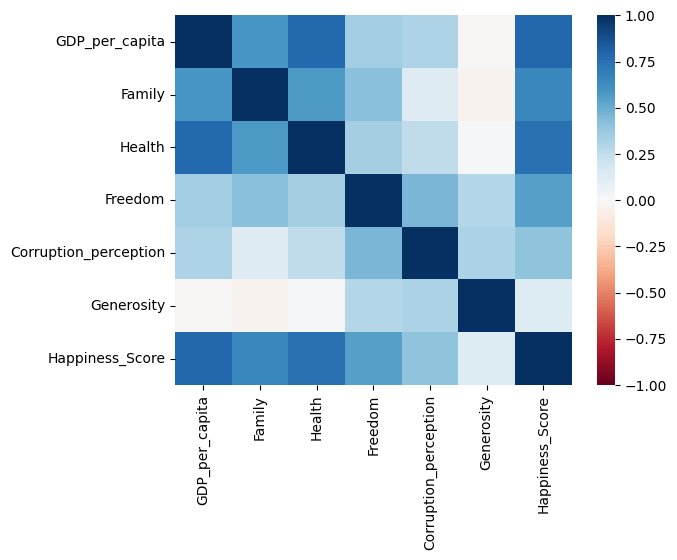

In [269]:
# Correlation matrix visualization
sns.heatmap(data.corr(), cmap="RdBu", vmin= -1, vmax=1)

Now lets analyse the Pearson coefficient and P values of different relations between indicators and the Happiness Score value

In [270]:
from scipy import stats

In [271]:
coeficients_list = []

# For each indicator we get the pearson coefficient with Happiness Score and the P value
for indicator in indicators:
    pearson_coef , p_value = stats.pearsonr(data[indicator],data["Happiness_Score"])
    coeficients_list.append([indicator,pearson_coef,p_value])
    
# Show our data as a Dataframe    
coeficients_df = pd.DataFrame(coeficients_list)
coeficients_df.columns = ["Indicator","Pearson coefficient", "P Value"]
coeficients_df.set_index("Indicator", inplace=True)
coeficients_df

,Pearson coefficient,P Value
Indicator,,
GDP_per_capita,0.789683,3.066646e-167
Family,0.651149,2.804017e-95
Health,0.742656,1.277973e-137
Freedom,0.553398,8.714212e-64
Corruption_perception,0.398992,3.622115e-31
Generosity,0.138613,1.028356e-04
Happiness_Score,1.000000,0.000000e+00


As we can see from the Pearson coefficients, relations between indicators and Happiness Score are positive linear relations. (Some stronger than others).
And since the P values of all relations are < 0.0001 we can say that they are statistically significant.

### Predictors analysis

In this section we'll create a compare different prediction models based in our data.

#### Multiple Linear Regression

##### Model Creation

Let's start by creating a Multiple Linear Regression using our indicators as predictors and the Happiness Score as our response variable

To begin let's juste take our numerical variables as predictors (excluding the Region variable) and let's see what it gives us

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
# Create a LinearModel object
lm = LinearRegression()

# Prepare our indicators
indicators.remove("Happiness_Score")

# Prepare our datasets
X = data[indicators]
Y = data[["Happiness_Score"]]

In [274]:
# Fit our model
lm.fit(X,Y)

model = "Happiness Score = " + str(lm.intercept_[0]) + "\n"

for i, indicator in enumerate(indicators):
    model = model + " + " + str(lm.coef_[0][i]) + " * ("+str(indicator)+") \n"

print(model)

Happiness Score = 2.1748432249523892
 + 1.1367627114937995 * (GDP_per_capita) 
 + 0.6456443688271405 * (Family) 
 + 1.0122962269804312 * (Health) 
 + 1.4815344875694476 * (Freedom) 
 + 0.8571541218772878 * (Corruption_perception) 
 + 0.5923020809248034 * (Generosity) 



It is interesting to see, based in our Multiple Linear Regression model, how our indicators impact the Happiness Score of a Country.
It is remarkable to say that indicators with more impact in our model are :

    - GCP per capita and,
    - Freedom
    
And indicators with less impact are : 

    - Generosity and
    - Family

It could be really interesting to see the impact of the Region variable in this indicators. As we can imagine the impact for each one may be not the same depending in the Countries regions.

##### Model Evaluation Using In-Sample Evaluation

In [275]:
# Import packages
import seaborn as sns
from sklearn.metrics import mean_squared_error

Important note: For this test we well evaluate our model with the same data we created it. Its important to note that the result in the evaluation will be completely unacurate as we are not using an out of box set to evaluate

In [276]:
# Create our predictions
yhat = lm.predict(X)

Let's calculate our Multiple Linear Regression Model's R^2 as well as the MSE of the in sample evaluation

In [277]:
R1 = lm.score(X,Y)
MSE1 = mean_squared_error(Y,yhat)

print("R square value = ",R1)
print("MSE = ", MSE1)

R square value =  0.7635596780315939
MSE =  0.3001225867567269


As we cannot plot a lineplot for a Multiple linear regression model. We'll use a distribution plot to compare the distribution of our data and the distribution of our predicted data.

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\604379445.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\604379445.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




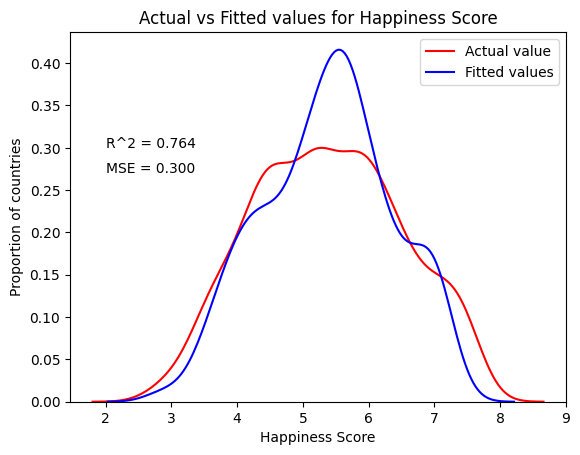

In [278]:
# Plot a distribution plot
ax1 = sns.distplot(Y, hist=False, color = "r", label="Actual value")
sns.distplot(yhat, hist=False, color="b", label ="Fitted values", ax = ax1)
plt.title("Actual vs Fitted values for Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Proportion of countries")
plt.legend()

plt.text(2, .30, ("R^2 = "+ str("%.3f" % R1)))
plt.text(2, .27, ("MSE = "+ str("%.3f" % MSE1)))

plt.show()
plt.close()

We can see that even if our model is reasonably good while predicting the most and the least happier countries scores. However while predicting medium happy countries scores its prediction is not that good.

As we said previously we cannot really based our model evaluation in this results as we are using the same data to fit and evaluate. But at least it gives us an idea of how our model can predict

Now lets try to add the Region variable. As our data is limited, dividing it to study each region separatetly will strongly affect our models accuracy, so instead of analyze the data separately by region, we'll insert our Region variable into the dataframe

In [279]:
# If Happiness Score not already in indicators
indicators.append("Happiness_Score")

In [280]:
# Group our data per country over the years using the mean of each value
df_grouped = df.groupby(["Country"])[indicators].mean()
df_grouped.head()

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score
Country,,,,,,,
Afghanistan,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,3.51280
Albania,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.71260
Algeria,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,5.66760
Angola,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,3.87225
Argentina,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.45940


In [281]:
# Add our Region variable as a column
df_grouped["Region"] = df_grouped.index.map(country_region)
df_grouped.head()

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score,Region
Country,,,,,,,,
Afghanistan,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,3.51280,Southern Asia
Albania,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.71260,Central and Eastern Europe
Algeria,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,5.66760,Middle East and Northern Africa
Angola,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,3.87225,Sub-Saharan Africa
Argentina,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.45940,Latin America and Caribbean


In [282]:
# Plot the distribution of Region categories
fig = px.histogram(df_grouped, x="Region",
                  title = "Countries per Region",
                  text_auto = ".2s",
                  color="Region")


# Set values over the bars
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Hide legend
fig.update_layout(showlegend=False)

fig.show()

As some of the Region categories are too small and can be regrouped, we'll create a new category "Asia" that will have : Southern Asia, Southestern Asia and Eastern Asia. Unluckily for North America we'll leave the region as it is

In [283]:
df_grouped.replace("Eastern Asia","Pacific Asia", inplace=True)
df_grouped.replace("Southeastern Asia","Pacific Asia", inplace=True)
df_grouped.replace("Australia and New Zealand","Pacific Asia", inplace=True)
df_grouped.replace("Southern Asia","Pacific Asia", inplace=True)

In [284]:
# Plot the distribution of Region categories
fig = px.histogram(df_grouped, x="Region",
                  title = "Countries per Region",
                  text_auto = ".2s",
                  color="Region")


# Set values over the bars
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

# Hide legend
fig.update_layout(showlegend=False)

fig.show()

Now we'll create dummy variables for our the Region

In [285]:
region_dummies = pd.get_dummies(df_grouped["Region"])
df_grouped = pd.concat([df_grouped, region_dummies], axis=1)
df_grouped.drop(['Region'], axis=1, inplace=True)
df_grouped.head()

,GDP_per_capita,Family,Health,Freedom,Corruption_perception,Generosity,Happiness_Score,Central and Eastern Europe,Latin America and Caribbean,Middle East and Northern Africa,North America,Pacific Asia,Sub-Saharan Africa,Western Europe
Country,,,,,,,,,,,,,,
Afghanistan,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,3.51280,False,False,False,False,True,False,False
Albania,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.71260,True,False,False,False,False,False,False
Algeria,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,5.66760,False,False,True,False,False,False,False
Angola,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,3.87225,False,False,False,False,False,True,False
Argentina,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.45940,False,True,False,False,False,False,False


In [286]:
# Make dummy variables binnary int
df_grouped.replace(False,0, inplace=True)
df_grouped.replace(True,1, inplace=True)
df_grouped.dtypes

GDP_per_capita                     float64
Family                             float64
Health                             float64
Freedom                            float64
Corruption_perception              float64
Generosity                         float64
Happiness_Score                    float64
Central and Eastern Europe           int64
Latin America and Caribbean          int64
Middle East and Northern Africa      int64
North America                        int64
Pacific Asia                         int64
Sub-Saharan Africa                   int64
Western Europe                       int64
dtype: object

Let's create a new Linear model using our new set of variables including the Region variable

In [287]:
# Create a LinearModel object
lm_2 = LinearRegression()


# Prepare our datasets
Y_2 = df_grouped[["Happiness_Score"]]
X_2 = df_grouped.drop(["Happiness_Score"], axis=1)

# Fit our model
lm_2.fit(X_2,Y_2)

model = "Happiness Score = " + str(lm_2.intercept_[0]) + "\n"

for i, indicator in enumerate(X_2.columns):
    model = model + " + " + str(lm_2.coef_[0][i]) + " * ("+str(indicator)+") \n"

print(model)

Happiness Score = 2.3552833344631905
 + 0.9249783525745683 * (GDP_per_capita) 
 + 0.9435038993148672 * (Family) 
 + 0.6526579676336692 * (Health) 
 + 1.3219887881995505 * (Freedom) 
 + 1.2337851527896508 * (Corruption_perception) 
 + 0.7264631800850867 * (Generosity) 
 + -0.10336245631861504 * (Central and Eastern Europe) 
 + 0.4060729721872606 * (Latin America and Caribbean) 
 + -0.16050432515387572 * (Middle East and Northern Africa) 
 + 0.37586443632719924 * (North America) 
 + -0.346839482200388 * (Pacific Asia) 
 + -0.29143021688975357 * (Sub-Saharan Africa) 
 + 0.12019907204817137 * (Western Europe) 



Lets see how our moder predicts values

In [288]:
# Create our predictions
yhat_2 = lm_2.predict(X_2)

In [289]:
# Calculate R^2
R2 = lm_2.score(X_2,Y_2)

# Calculate MSE
MSE2 = mean_squared_error(Y_2,yhat_2)


print("R square value = ",R2)
print("MSE = ", MSE2)

R square value =  0.8543281268968728
MSE =  0.17896521455082035


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\951938041.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\951938041.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




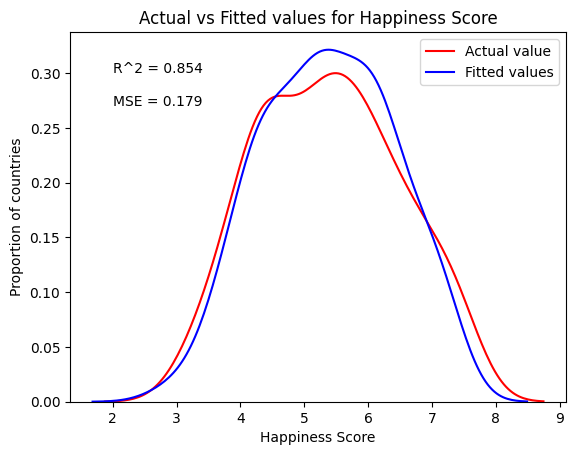

In [290]:
# Plot a distribution plot
ax2 = sns.distplot(Y_2, hist=False, color = "r", label="Actual value")
sns.distplot(yhat_2, hist=False, color="b", label ="Fitted values", ax = ax2)
plt.title("Actual vs Fitted values for Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Proportion of countries")
plt.legend()

plt.text(2, .30, ("R^2 = "+ str("%.3f" % R2)))
plt.text(2, .27, ("MSE = "+ str("%.3f" % MSE2)))

plt.show()
plt.close()

Lets compare the obtained results while using the Region variable and not in our dataset

C:\Users\osval\AppData\Local\Temp\ipykernel_25336\1434955991.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\1434955991.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\osval\AppData\Local\Temp\ipykernel_25336\1434955991.py:6: UserWarning

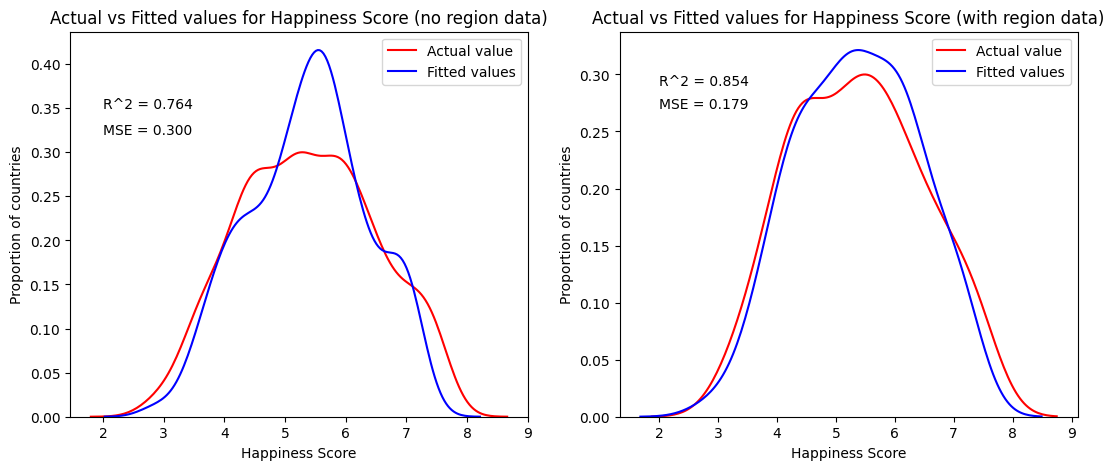

In [291]:
fig, axs = plt.subplots(ncols=2, figsize=(13,5))

ax1_1 = sns.distplot(Y, hist=False, color = "r", label="Actual value", ax=axs[0])
sns.distplot(yhat, hist=False, color="b", label ="Fitted values", ax = ax1_1)

ax2_1 = sns.distplot(Y_2, hist=False, color = "r", label="Actual value", ax=axs[1])
sns.distplot(yhat_2, hist=False, color="b", label ="Fitted values", ax = ax2_1)

# First plot
ax1_1.set_title("Actual vs Fitted values for Happiness Score (no region data)")
ax1_1.set_xlabel("Happiness Score")
ax1_1.set_ylabel("Proportion of countries")
ax1_1.legend()
ax1_1.text(2, .35, ("R^2 = "+ str("%.3f" % R1)))
ax1_1.text(2, .32, ("MSE = "+ str("%.3f" % MSE1)))  

# Second plot
ax2_1.set_title("Actual vs Fitted values for Happiness Score (with region data)")
ax2_1.set_xlabel("Happiness Score")
ax2_1.set_ylabel("Proportion of countries")
ax2_1.legend()
ax2_1.text(2, .29, ("R^2 = "+ str("%.3f" % R2)))
ax2_1.text(2, .27, ("MSE = "+ str("%.3f" % MSE2))) 


plt.show()
plt.close()

It is quite evident that the use of our Region variable as a predictor is important in order to improve our model predictions. For the next sections we'll test and compare different prediction models in order to get the one that performs the best.

### Models creation

Now let's create other types of models to get the best possible results

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

This time we'll evaluate models using an out-sample set. So we have to create our train and test sets.

In [293]:
# Training and testing data split
x_data = X_2
y_data = Y_2

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 0)

print("Number of test samples : ", x_test.shape[0])
print("Number of train samples : ", x_train.shape[0])

Number of test samples :  50
Number of train samples :  114


#### Linear Regression

For the Lineal Regression we'll use the model we have just created but this time we'll do the our-sample evaluation.

In [294]:
# Create a LinearModel object
lgm = LinearRegression()

# Fit our model
lgm.fit(x_train, y_train)

model = "Happiness Score = " + str(lgm.intercept_[0]) + "\n"

for i, indicator in enumerate(x_train.columns):
    model = model + " + " + str(lgm.coef_[0][i]) + " * ("+str(indicator)+") \n"

print(model)

Happiness Score = 2.233877953723847
 + 0.7190860572271169 * (GDP_per_capita) 
 + 1.039545796553554 * (Family) 
 + 0.7652225925908285 * (Health) 
 + 1.448647544786083 * (Freedom) 
 + 1.9687379563297058 * (Corruption_perception) 
 + 0.6697624778891597 * (Generosity) 
 + -0.05320338147900375 * (Central and Eastern Europe) 
 + 0.506742530900108 * (Latin America and Caribbean) 
 + -0.10843531857810534 * (Middle East and Northern Africa) 
 + 0.3488763975068253 * (North America) 
 + -0.4467119600948283 * (Pacific Asia) 
 + -0.31083584179567836 * (Sub-Saharan Africa) 
 + 0.06356757354068443 * (Western Europe) 



In [304]:
# Create our predictions
yhat_lgm = lgm.predict(x_test)

lm_r2 = lgm.score(x_test,y_test)
lm_mse = mean_squared_error(y_test,yhat_lgm)

print("R square value = ", lm_r2)
print("MSE = ", mean_squared_error(y_test,yhat_lgm))

R square value =  0.7757644504595864
MSE =  0.28907795092566757


#### Polynomial Regression

Here we'll analyze polynomial regression models using different polynomial degrees.

Text(0.5, 1.0, 'R^2 Using test data')

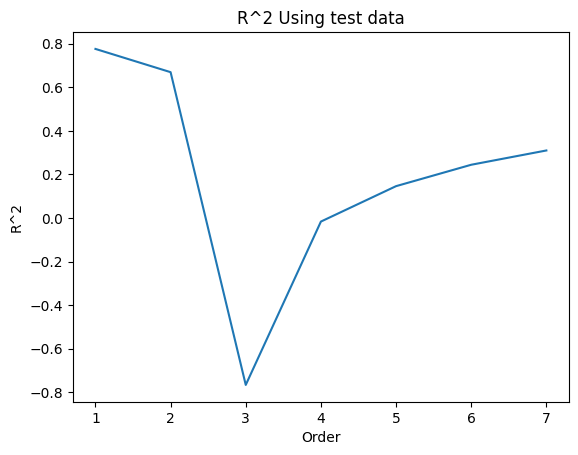

In [296]:
rsqu_test = []
order = [1,2,3,4,5,6,7]

for n in order :
    # Create a polynomial transformation of degree n
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)

    # Create a Linear regression model
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)

    # Add our score to the list
    rsqu_test.append(poly.score(x_test_pr, y_test))
    

plt.plot(order, rsqu_test)
plt.xlabel("Order")
plt.ylabel("R^2")
plt.title("R^2 Using test data")

It's interesting to see that our best polynomial is a simple Linear polynomial (degree 1). So no need to go further in polynominal analysis we have already the best model :) 

#### XGBoost model

In [297]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

To begin let's create a simple XGBoost model

In [305]:
# Simple model
xgbreg = XGBRegressor(random_state = 0)

# Fit the model
xgbreg.fit(x_train, y_train)

# Get predictions
predictions_xgb = xgbreg.predict(x_test)

xgb_mse = mean_squared_error(y_test, predictions_xgb)
xgb_r2 = xgbreg.score(x_test, y_test)

print("R^2 : ", xgb_r2)
print("MSE : ", xgb_mse)

R^2 :  0.7635480118019516
MSE :  0.3048270284559532


Now, using some hyperparameters let's try to improve our XGBoost model

In [299]:
# Hyperparameters definition
params = {
    'n_estimators' : [100,200,400,600],
    'learning_rate' : [0.01, 0.02, 0.04, 0.06, 0.08, 1],
    'max_depth' : [3,4,5,6]
}

In [300]:
# Get our best model
grid = GridSearchCV(estimator=XGBRegressor(), param_grid= params, cv=3)
grid.fit(x_data, y_data)

print("Best estimator : ", grid.best_estimator_)
print("Best_score : ", grid.best_score_)
print("Best parameters : ", grid.best_params_)

grid_results = pd.DataFrame(grid.cv_results_)

Best estimator :  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Best_score :  0.8083605648550529
Best parameters :  {'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 400}


We train the final model using the best parameters and all our training data

In [308]:
# Model creation
xgbreg = grid.best_estimator_.fit(x_train, y_train)

In [309]:
# Model evaluation
y_hat = grid.best_estimator_.predict(x_test)

xgb_mse = mean_squared_error(y_test, y_hat)
xgb_r2 = xgbreg.score(x_test, y_test)


print("R^2 : ", xgb_r2)
print("MSE for best XGBoost model : " ,xgb_mse)

R^2 :  0.7798033786759238
MSE for best XGBoost model :  0.28387108209908035


In [310]:
# Results
res = pd.DataFrame([
    ["Linear Model", lm_r2, lm_mse],
    ["XGBoost Model", xgb_r2, xgb_mse]
])
res.columns= ["Model","R^2","MSE"]
res.set_index("Model", inplace=True)
res

,R^2,MSE
Model,,
Linear Model,0.775764,0.289078
XGBoost Model,0.779803,0.283871


As we can see our XGBoost model perfoms better while predicting the Happiness Score of a country. However the performance of both models is nearly the same.